In [28]:
import requests
from bs4 import BeautifulSoup
import networkx as nx
import matplotlib.pyplot as plt

# function to extract text from HTML tags
def extract_text(tag):
    return tag.name
#     if tag.name == 'a':
#         return tag.get('href')
#     else:
#         return tag.text.strip()

# function to recursively create edges between tags
def add_edges(graph, parent, tag):
    if parent is not None:
        graph.add_edge(parent, tag)
    for child in tag.children:
        if child.name is not None:
            add_edges(graph, tag, child)

# function to create the graph from HTML
def create_graph(url):
    response = requests.get(url)
#     content = "<html><body> <div> <p> Hello </p>  <p>world</p>  </div>  </body> </html>"
    soup = BeautifulSoup(response.content, 'html.parser')
    graph = nx.DiGraph()
    for tag in soup.find_all(['div', 'p', 'a']):
        print(tag)
        node = extract_text(tag)
        if node:
            graph.add_node(node)
            add_edges(graph, None, tag)
    return graph

# example usage
url = 'https://www.hofstra.edu/admission/apply.html'
graph = create_graph(url)


<a class="visually-hidden focusable skip-link" href="#main-content">
      Skip to main content
    </a>
<div class="dialog-off-canvas-main-canvas d-flex flex-column h-100" data-off-canvas-main-canvas="">
<header>
<nav class="navbar navbar-expand-lg">
<div class="container">
<div class="navbar-brand">
<div class="region region-nav-branding">
<div class="block block-system block-system-branding-block" id="block-hofstra-branding">
<a class="site-logo white-logo d-none d-lg-block" href="/" rel="home">
<img alt="Home" src="https://www.hofstra.edu/themes/contrib/hofstra/assets/img/logo-white.png"/>
</a>
<a class="site-logo blue-logo d-none d-lg-block" href="/" rel="home">
<img alt="Home" src="https://www.hofstra.edu/themes/contrib/hofstra/assets/img/logo-blue.png"/>
</a>
<a class="site-logo d-block d-lg-none" href="/" rel="home">
<img alt="Home" src="https://www.hofstra.edu/themes/contrib/hofstra/assets/img/logo-shield.png"/>
</a>
</div>
</div>
</div>
<button aria-controls="mobile-nav" aria

<div class="container">
<div class="navbar-brand">
<div class="region region-nav-branding">
<div class="block block-system block-system-branding-block" id="block-hofstra-branding">
<a class="site-logo white-logo d-none d-lg-block" href="/" rel="home">
<img alt="Home" src="https://www.hofstra.edu/themes/contrib/hofstra/assets/img/logo-white.png"/>
</a>
<a class="site-logo blue-logo d-none d-lg-block" href="/" rel="home">
<img alt="Home" src="https://www.hofstra.edu/themes/contrib/hofstra/assets/img/logo-blue.png"/>
</a>
<a class="site-logo d-block d-lg-none" href="/" rel="home">
<img alt="Home" src="https://www.hofstra.edu/themes/contrib/hofstra/assets/img/logo-shield.png"/>
</a>
</div>
</div>
</div>
<button aria-controls="mobile-nav" aria-expanded="false" aria-label="Toggle navigation" class="navbar-toggler" data-target="#mobile-nav" data-toggle="collapse" type="button">
<span>Menu</span><span class="navbar-toggler-icon"></span>
</button>
<button aria-controls="search" aria-expanded="f

<div class="container">
<div class="row">
<div class="col-12">
<div class="inner d-flex flex-column flex-wrap">
<p class="eyebrow mb-20 mb-lg-25">Apply for Admission</p>
<h1 class="">Apply</h1>
<div class="body text-center">
<p><p><script async="async" src="https://admission.hofstra.edu/ping">/**/</script><!-- ENCOURA --><script type="text/javascript">var ordnumber = Math.random() * 10000000000000;var sscUrl = ("https:" == document.location.protocol ? "https://" : "http://") + "trkn.us/pixel/conv/ppt=1530;g=apply_first_year;gid=8746;ord="+ordnumber+";v=120";var x = document.createElement("IMG");x.setAttribute("src", sscUrl);x.setAttribute("width", "1");x.setAttribute("height", "1");document.body.appendChild(x);</script><!-- END ENCOURA --><!-- Hofstra University JavaScript Conversion; Goal ID: 'ug_apply_landing_page' --><script type="text/javascript">var ordnumber = Math.random() * 10000000000000;var sscUrl = ("https:" == document.location.protocol ? "https://" : "http://") + "trkn.us/

<div class="col-12 col-lg-4 content">
<div class="region region-footer-brand"><div class="block" id="block-sitebranding"><a class="site-logo" href="/" rel="home"><img alt="Home" src="/sites/default/files/main-nav-logo_0.png"/></a></div><div class="block block-block-content block-block-content32c87962-f337-426d-ae42-2366eb1f086d" id="block-contactinfo"><div class="clearfix text-formatted field field--name-body field--type-text-with-summary field--label-hidden field__item"><p>Hempstead, N.Y. 11549-1000<br/>
(516) 463-6600<br/><a href="/visitors/map.html" style="color:#FFF;">View Hofstra Campus Map</a><br/><a alt="Launch Experience" href="https://youvis.it/IeCdWv" style="color:#FFF !important;">Take a Virtual Tour</a></p><script async="async" defer="defer" src="https://www.youvisit.com/tour/Embed/js3"></script></div></div><div class="break-column"></div><div class="block block-block-content block-block-content7534e577-660e-4bd1-88ad-4c7b5f4e8a73" id="block-footercontent"><div class="clear

In [29]:
root_nodes = [n for n, d in graph.in_degree() if d == 0]
print("Root nodes:", root_nodes)

Root nodes: ['a', 'div', <div class="dialog-off-canvas-main-canvas d-flex flex-column h-100" data-off-canvas-main-canvas="">
<header>
<nav class="navbar navbar-expand-lg">
<div class="container">
<div class="navbar-brand">
<div class="region region-nav-branding">
<div class="block block-system block-system-branding-block" id="block-hofstra-branding">
<a class="site-logo white-logo d-none d-lg-block" href="/" rel="home">
<img alt="Home" src="https://www.hofstra.edu/themes/contrib/hofstra/assets/img/logo-white.png"/>
</a>
<a class="site-logo blue-logo d-none d-lg-block" href="/" rel="home">
<img alt="Home" src="https://www.hofstra.edu/themes/contrib/hofstra/assets/img/logo-blue.png"/>
</a>
<a class="site-logo d-block d-lg-none" href="/" rel="home">
<img alt="Home" src="https://www.hofstra.edu/themes/contrib/hofstra/assets/img/logo-shield.png"/>
</a>
</div>
</div>
</div>
<button aria-controls="mobile-nav" aria-expanded="false" aria-label="Toggle navigation" class="navbar-toggler" data-tar

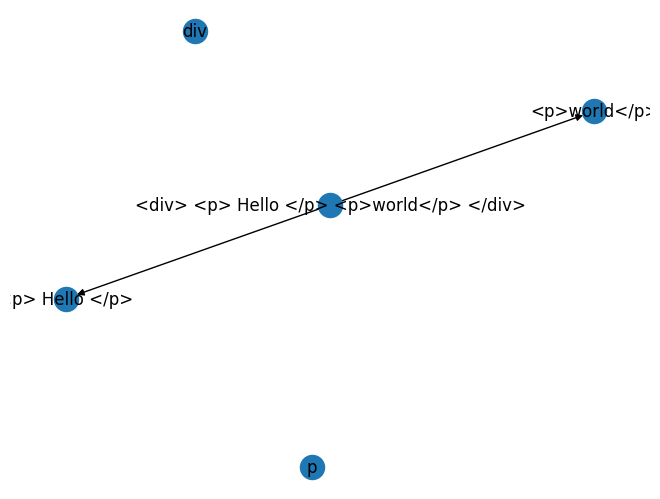

In [27]:
nx.draw(graph, with_labels=True)
plt.show()


In [4]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 559.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 497.9 kB/s eta 0:00:0000:0100:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 1.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.2 MB/s eta 0:00:00-:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 788.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 362.6 kB/s eta 0:00:00a 0:00:01


In [22]:
!pip install pydot

  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)
